In [1]:
import pandas as pd
dim= pd.read_json("dim_customer.json")
invoice=pd.read_csv('fct_invoice.csv')


dim
invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# Easy

### 1. How many unique customers are in the dataset?

In [2]:
dim['full name']= dim['first_name']+' ' +dim['last_name']

dim['full name'].nunique()

4992

### 2. What are the different categories of products available? How many unique categories are there?

In [4]:
#different categories available
invoice['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [3]:
#number of unique categories
invoice['category'].nunique()

8

### 3. Which payment method is the most popular? How many times was it used?

In [5]:
invoice['payment_method'].value_counts().idxmax

<bound method Series.idxmax of Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64>

### Cash is most popular with a usage of 44,447 times

# Medium

### 1. What are the three most popular categories, by total sales?

In [57]:
invoice['sales']=invoice['price']*invoice['quantity']

In [58]:
#three most popular categories with its corresponding sales

invoice.groupby(['category'])['sales'].sum().nlargest(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

### 2. What are the total sales attributed to customers over the age of 45?

In [17]:
invoiceduplicate = invoice.copy()

invoiceduplicate.rename(columns={'customer_id': 'id'}, inplace=True)

merged_df = pd.merge(dim, invoiceduplicate, on='id')

In [61]:
#Check the value under True. This refers to the total sales attributed to customers over 45 years old.

merged_df.groupby([merged_df['age']>45])['sales'].sum()

age
False    1.694660e+08
True     8.203977e+07
Name: sales, dtype: float64

### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [ ]:
#### The method to get the date was taken from ChatGPT
### The seasonal trends show that there is usually a spike in the sales during the start of the year (around January) and also during near the middle of the year (around May).
### The peak sales would be during the beginning of 2022, with the category of clothing bringing in the most sales.

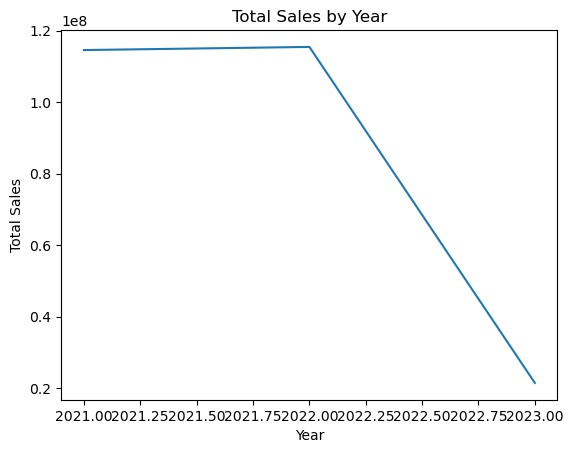

In [46]:
#How the data is dristributed across different invoice dates YEARLY.

import pandas as pd
import matplotlib.pyplot as plt

merged_df['date_column'] = pd.to_datetime(merged_df['invoice_date'])

sales_by_year = merged_df.groupby(merged_df['date_column'].dt.year)['sales'].sum()

plt.plot(sales_by_year.index, sales_by_year.values)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

plt.show()


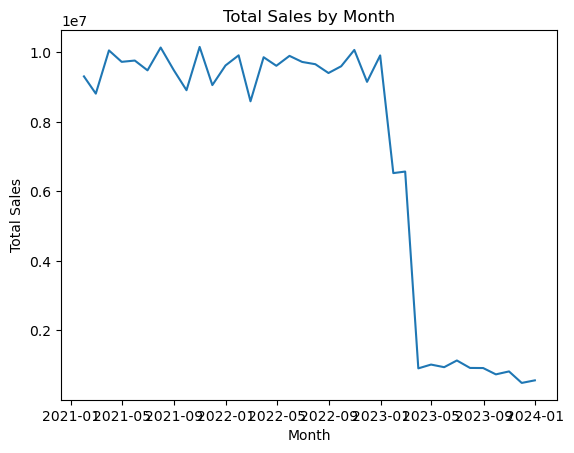

In [47]:
#How the data is dristributed across different invoice dates MONTHLY.
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named merged_df with a 'invoice_date' and 'sales' column
merged_df['date_column'] = pd.to_datetime(merged_df['invoice_date'])

# Group the sales data by month and calculate the total sales for each month
sales_by_month = merged_df.groupby(pd.Grouper(key='date_column', freq='M'))['sales'].sum()

# Plot the total sales by month
plt.plot(sales_by_month.index, sales_by_month.values)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

plt.show()


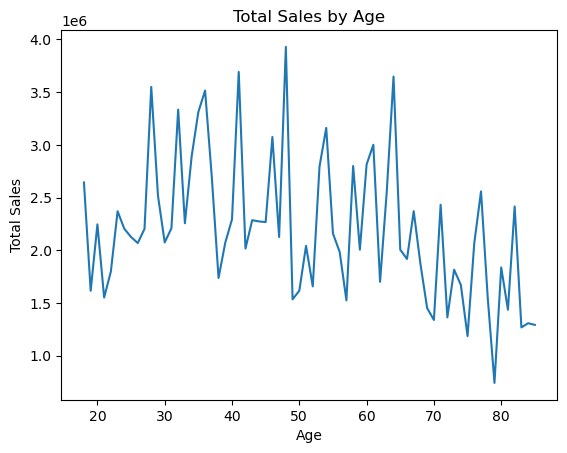

In [48]:
#How the data is dristributed across different ages with different categories.
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named merged_df with an 'age' column and 'sales' column

# Group the sales data by age and calculate the total sales for each age
sales_by_age = merged_df.groupby('age')['sales'].sum()

# Plot the total sales by age
plt.plot(sales_by_age.index, sales_by_age.values)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.title('Total Sales by Age')

plt.show()


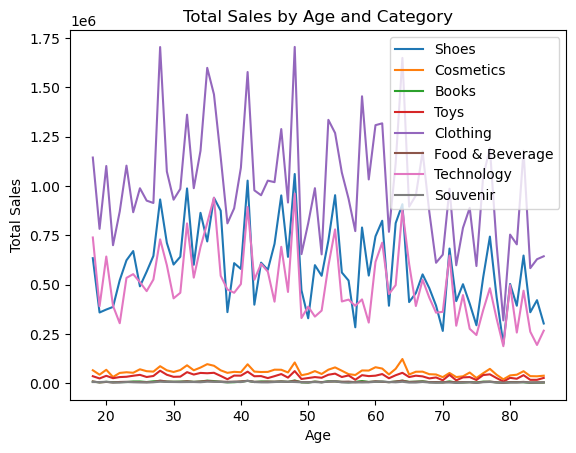

In [49]:
#How the data is dristributed across different ages with different categories.
import pandas as pd
import matplotlib.pyplot as plt

sales_by_category_age = merged_df.groupby(['category', 'age'])['sales'].sum()

for category in merged_df['category'].unique():
    category_data = sales_by_category_age.loc[category]
    plt.plot(category_data.index, category_data.values, label=category)

plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.title('Total Sales by Age, separated by Category')
plt.legend()

plt.show()


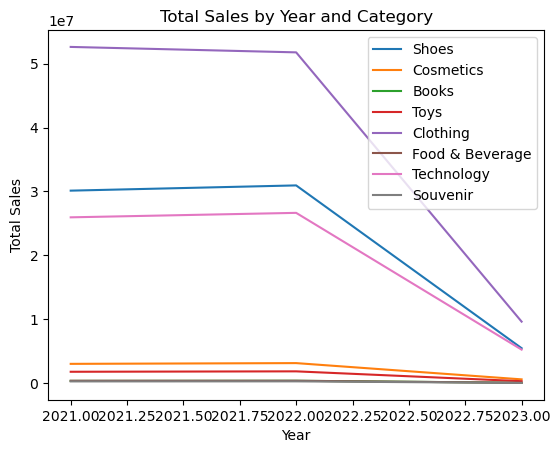

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

#This shous how the sales for different categories vary through the years, with reference to the invoice dates.

merged_df['year'] = pd.to_datetime(merged_df['date_column']).dt.year

# Group the sales data by category and year, and calculate the total sales for each combination
sales_by_category_year = merged_df.groupby(['category', 'year'])['sales'].sum()

# Iterate over unique categories and plot the total sales for each category
for category in merged_df['category'].unique():
    category_data = sales_by_category_year.loc[category]
    plt.plot(category_data.index, category_data.values, label=category)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year and Category')
plt.legend()

plt.show()


# Hard

### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [62]:
merged_df['decade_age_range']=(merged_df['age']//10)*10

In [63]:
import pandas as pd

#ChatGPT was used to learn how to create a pivot table

pivot_table = pd.pivot_table(merged_df, values='sales', index='category', columns='decade_age_range', aggfunc=sum)

# Display the pivot table
pivot_table

decade_age_range,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
